In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
#connect drive
from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pwd

/content


# Dataset I - Penguins Dataset

In [ ]:
# PENGUINE_PATH = "/content/drive/MyDrive/UB school work/Fall 23/574 - ML /assignment1/noisy_datasets/penguins.csv"

# raw_df = pd.read_csv(PENGUINE_PATH)
raw_df = pd.read_csv('penguins.csv')

raw_df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [ ]:
print(raw_df.info())
raw_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB
None


,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


### Handle missing data
- drop if not a lot of rows
- Impute missing data. Replace the missing entries with the mean/median/mode of the features. You can use K-Nearest Neighbor algorithm to find the matching sample.

Missing values and %
gender: 17 - 4.941860465116279%
species: 11 - 3.1976744186046515%
bill_depth_mm: 11 - 3.1976744186046515%
island: 10 - 2.9069767441860463%
flipper_length_mm: 8 - 2.3255813953488373%
bill_length_mm: 7 - 2.0348837209302326%
body_mass_g: 5 - 1.4534883720930232%
year: 2 - 0.5813953488372093%
calorie requirement: 0 - 0.0%
average sleep duration: 0 - 0.0%


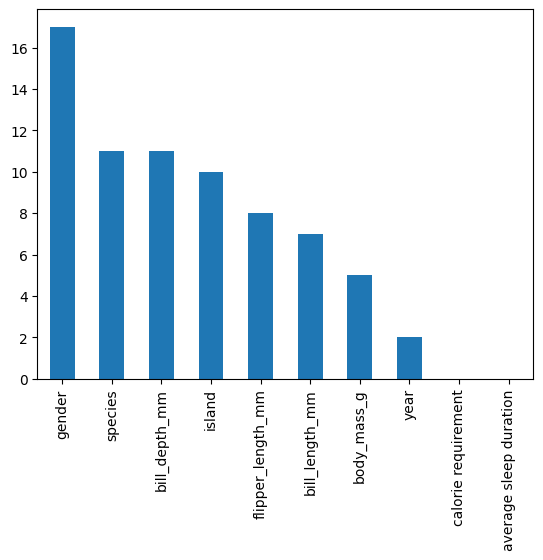

In [ ]:
#Count missing values
missing = raw_df.isna().sum().sort_values(ascending=False)
missing.plot(kind = 'bar')
print("Missing values and %")
for k,v in missing.items():
  print(f'{k}: {v} - {(v / raw_df.shape[0]) * 100}%')


In [ ]:
#Calculate the total rows if drop na
drop_na_rows = raw_df[raw_df.isna().any(axis = 1)]
print(f'The total rows to be dropped is {len(drop_na_rows)}, {(len(drop_na_rows) / raw_df.shape[0])* 100}%')

#Experiment with Dropping NAs, try other methods to improve accuracy if neccesary
df = raw_df.dropna(inplace = False)
print('original shape = ', raw_df.shape)
print('After dropping NA values ', df.shape)

The total rows to be dropped is 39, 11.337209302325581%
original shape =  (344, 10)
After dropping NA values  (305, 10)


In [ ]:
df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
5,Adelie,Torgersen,4403,13,39.3,20.6,190.0,3650.0,male,2007.0


### Clean the values in categorical columns

For example, in the penguins dataset, the "Species" feature might appear as "Adelie" or
"adelie," both of which refer to the same penguin species. These variations should be
standardized to a consistent format such as "Adelie" or "adelie" to ensure consistency.

In [ ]:
all_cols = df.columns
numeric_cols = df._get_numeric_data().columns
categorical_cols = list(set(all_cols) - set(numeric_cols))

print(numeric_cols)
print(categorical_cols)

Index(['calorie requirement', 'average sleep duration', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')
['gender', 'species', 'island']


In [ ]:
print(df.columns)

cat_cols = ['species', 'island', 'gender']

for c in cat_cols:
  print(f'COL = ',c)
  #lower case the string values
  df[c] = df[c].str.lower()
  print(df[c].unique())
  print()

df.head()

Index(['species', 'island', 'calorie requirement', 'average sleep duration',
       'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'gender', 'year'],
      dtype='object')
COL =  species
['adelie' 'gentoo' 'chinstrap']

COL =  island
['torgersen' 'biscoe' 'dream']

COL =  gender
['male' 'female']



<ipython-input-9-e075754abed9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].str.lower()


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,adelie,torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,adelie,torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,adelie,torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
4,adelie,torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
5,adelie,torgersen,4403,13,39.3,20.6,190.0,3650.0,male,2007.0


### Handle outliers

- Remove outliers. If there are just a few outliers is limited, you may eliminate the rows containing these outliers.

- Impute outliers. Replace the outliers with the mean/median/mode of the feature.


In [ ]:
#Categorical Columns
print(numeric_cols)

Index(['calorie requirement', 'average sleep duration', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')


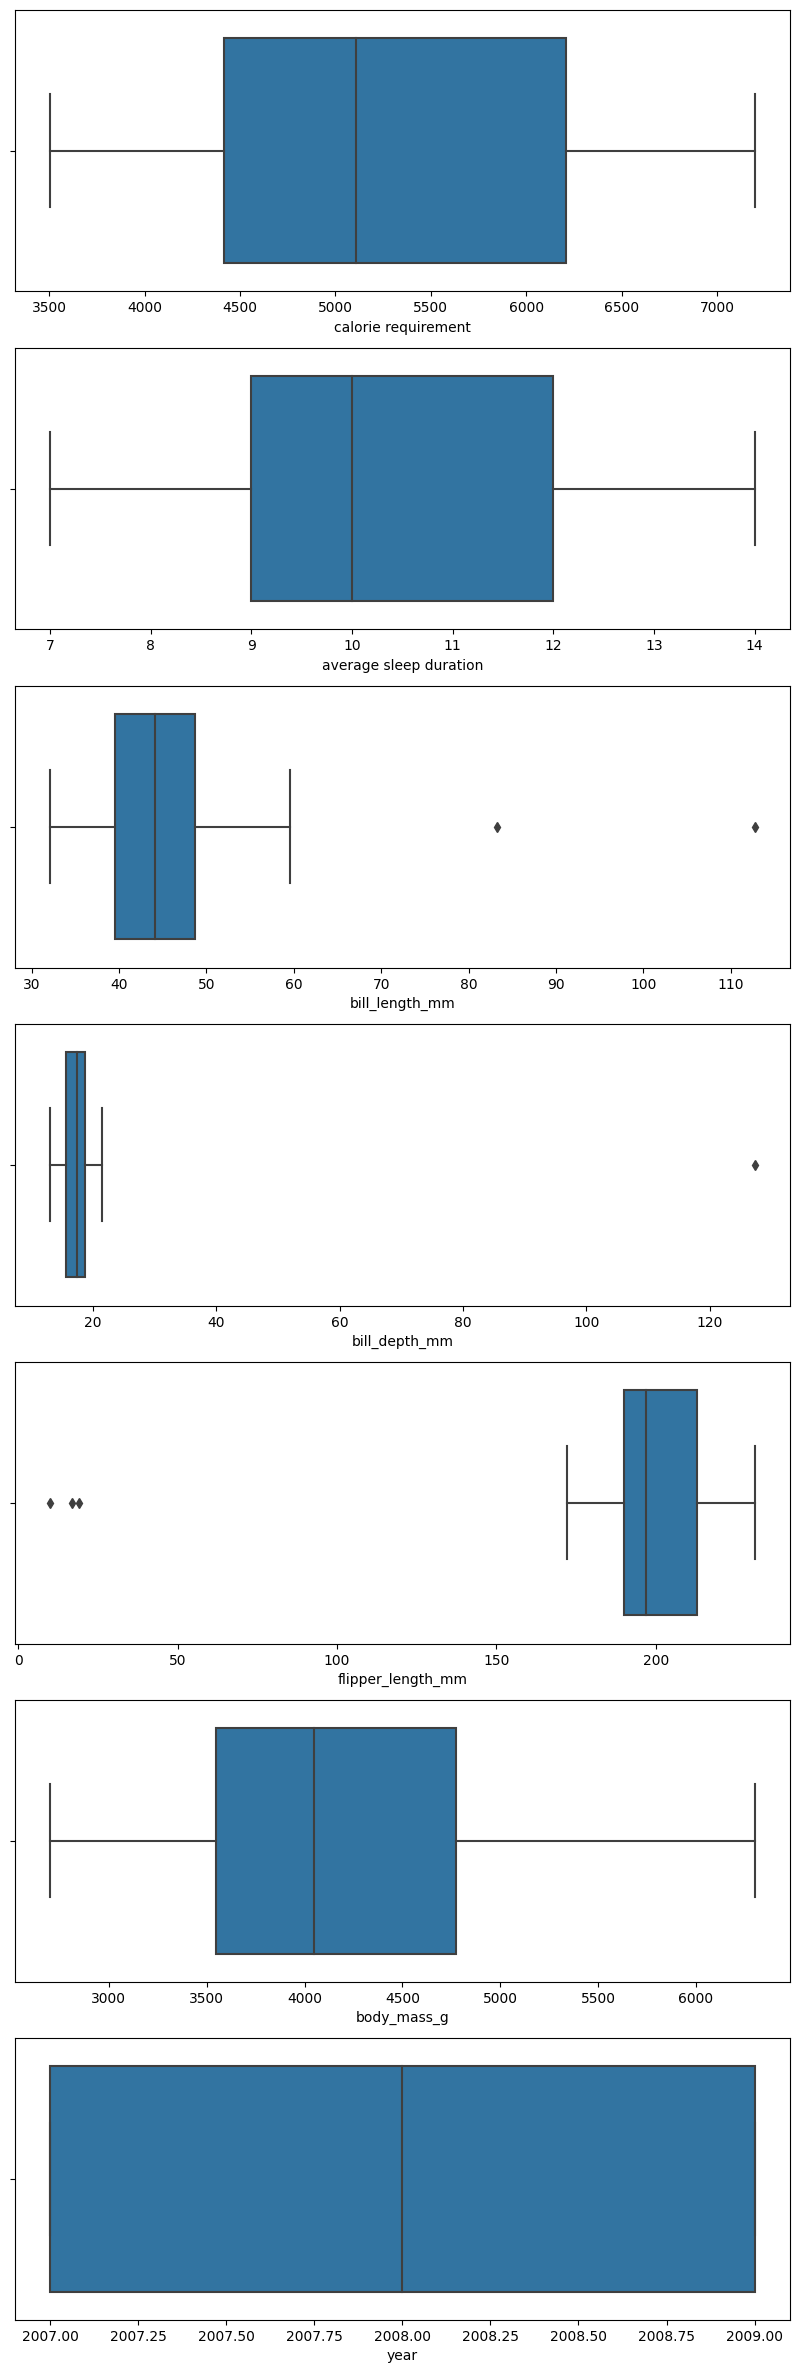

In [ ]:
#Number columns

# Box plot each numeric columns to detect outliers
fig, ax = plt.subplots(len(numeric_cols),1, figsize=(10,30))
for i, c in enumerate(numeric_cols):
  # sns.boxplot(x = df[c], ax = ax[i])
  sns.boxplot(x = df[c], ax = ax[i])
  # plt.show()



In [ ]:
# c = 'bill_length_mm'
# res = df[c].loc[df[c].between(lower, upper)].reset_index()
print(df.shape)

def remove_outliers(c, df, debug = True):
  q1 = df[c].quantile(0.25)
  q3 = df[c].quantile(0.75)

  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  prev = df.shape[0]


  new_df = df.loc[df[c].between(lower, upper)]
  outliers_count = prev - new_df.shape[0]
  return new_df, outliers_count


for c in numeric_cols:
  df, count = remove_outliers(c, df)
  print(f'Detect and removed outliers {count} for column = {c}')

print("DF shape after removed outliers")
print(df.shape)


(305, 10)
Detect and removed outliers 0 for column = calorie requirement
Detect and removed outliers 0 for column = average sleep duration
Detect and removed outliers 2 for column = bill_length_mm
Detect and removed outliers 1 for column = bill_depth_mm
Detect and removed outliers 2 for column = flipper_length_mm
Detect and removed outliers 0 for column = body_mass_g
Detect and removed outliers 0 for column = year
DF shape after removed outliers
(300, 10)


In [ ]:
df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,adelie,torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,adelie,torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,adelie,torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
4,adelie,torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
5,adelie,torgersen,4403,13,39.3,20.6,190.0,3650.0,male,2007.0


### Visualization

provide at least 5
visualization graphs related to your dataset. You can utilize any columns or a
combination of columns in your dataset to generate graphs. E.g. correlation matrix,
features vs. the target, counts of categorical features vs. the target.

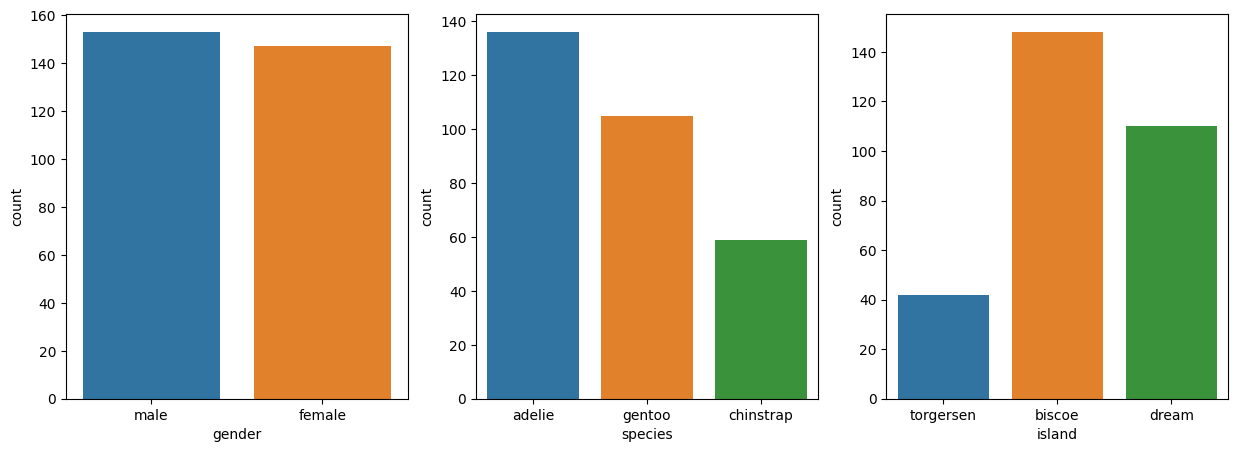

In [ ]:
#Showing the countplot of species, gender, islands

fig, ax = plt.subplots(1,len(categorical_cols), figsize=(15,5))

for i, c in enumerate(categorical_cols):
  sns.countplot(x = df[c], ax = ax[i])

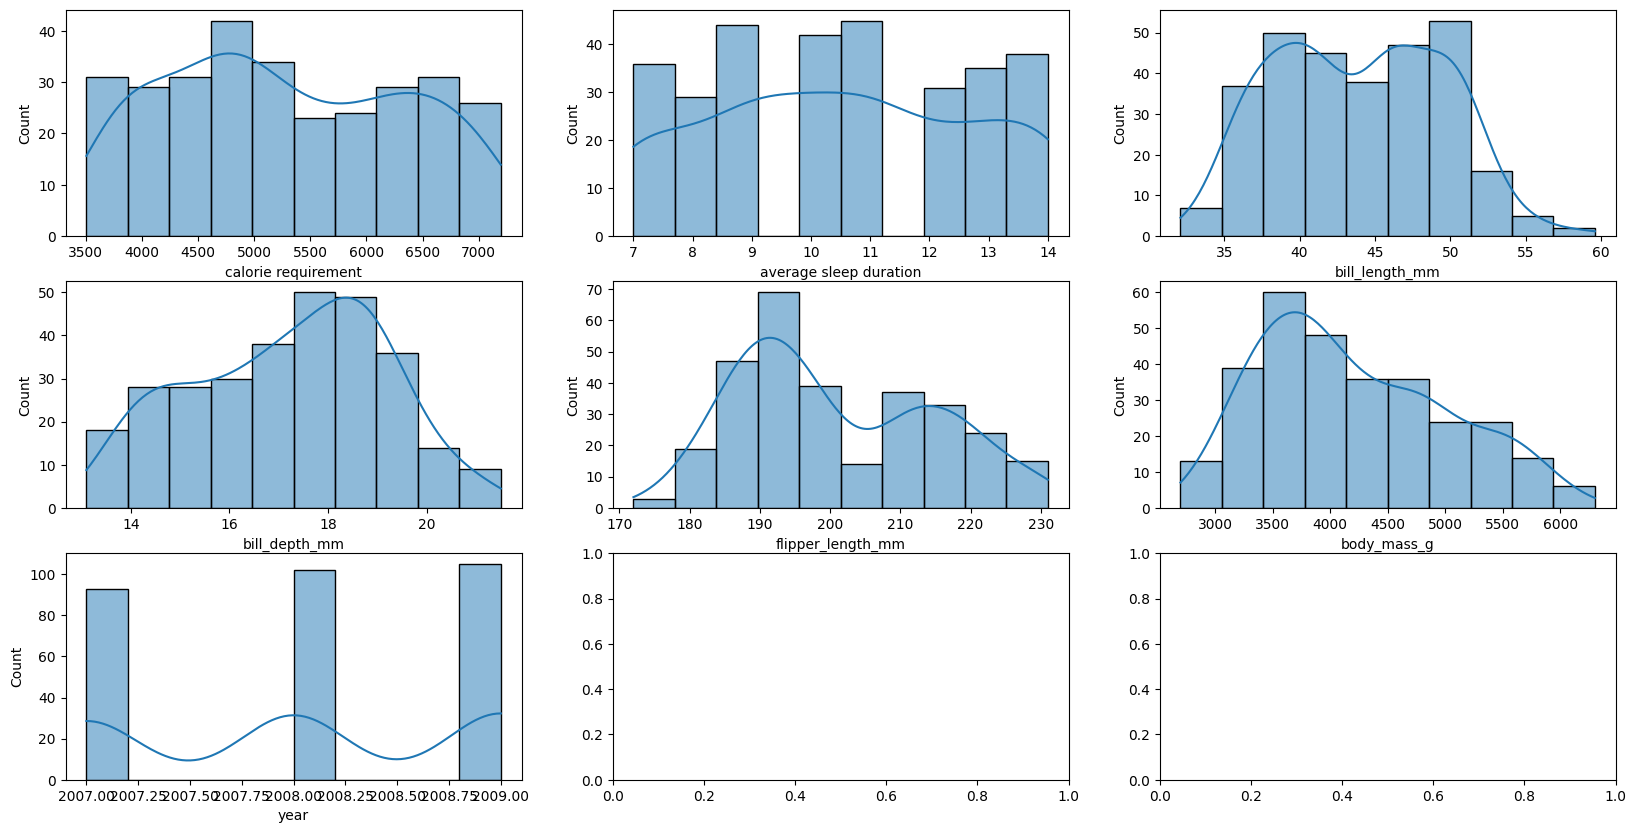

In [ ]:
import math

numeric_cols = df._get_numeric_data().columns

def plot_hist(df, num_cols):

  cols =len(num_cols)  // 2
  rows = math.ceil(cols)

  i = 0
  fig,ax = plt.subplots(rows,(cols),figsize=(20,10))
  for r, axe_row in enumerate(ax):
    for c, ax in enumerate(axe_row):
      if i < len(num_cols):
        df_col = num_cols[i]
        sns.histplot(df[df_col], kde = True, ax = ax)
        i+=1
      else:
        break

plot_hist(df, num_cols = numeric_cols)



<ipython-input-57-84eb9ff0cf9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()
<ipython-input-57-84eb9ff0cf9f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs_corr_mat = abs(df.corr())


Text(0.5, 1.0, 'Absolute Correlation')

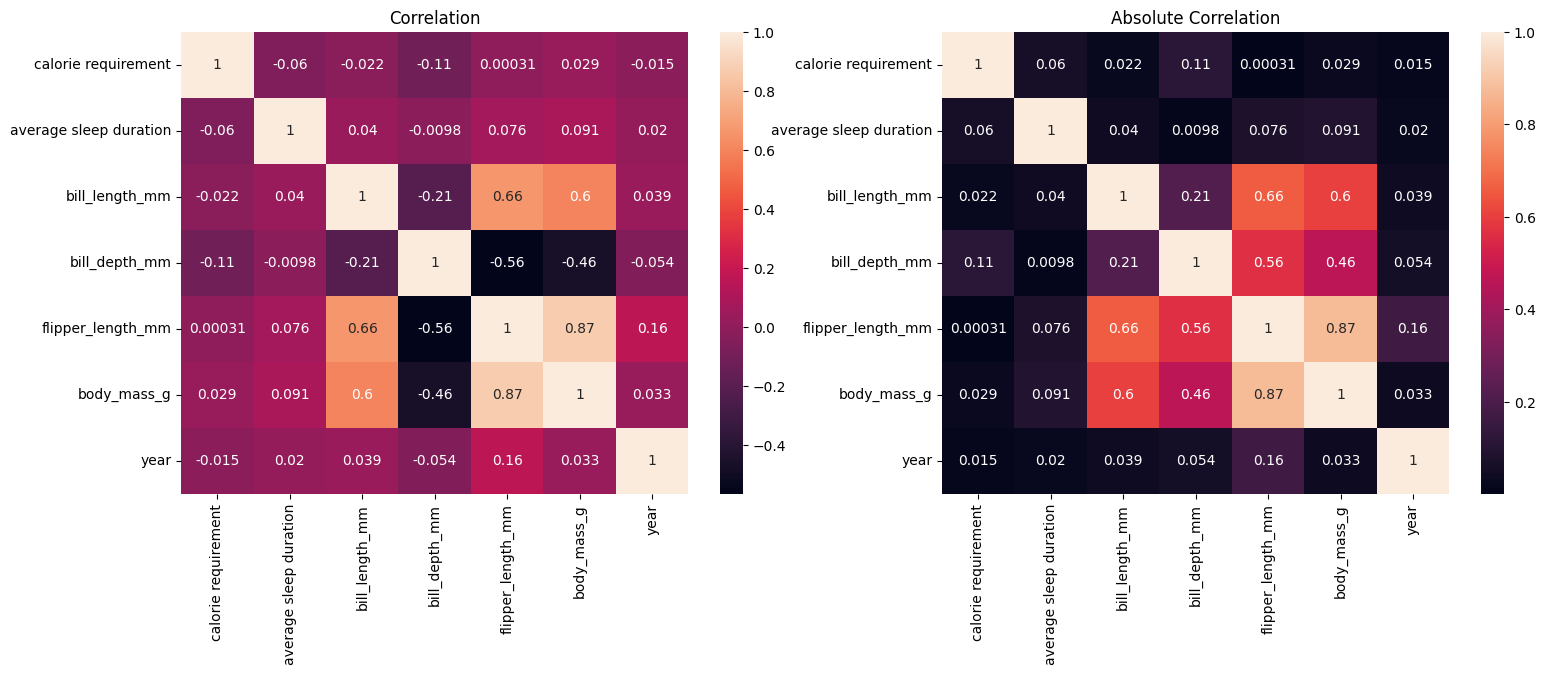

In [ ]:
corr_mat = df.corr()
abs_corr_mat = abs(df.corr())

fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.heatmap(corr_mat, annot=True, ax = ax[0])
ax[0].set_title("Correlation")
sns.heatmap(abs_corr_mat, annot=True, ax = ax[1])
ax[1].set_title("Absolute Correlation")

### Identify correlation

performance. You can compute the correlation matrix between the
features and the target variable. Features with a low correlation coefficient should be
identified and subsequently dropped from the dataset to enhance model performance.

In [ ]:
#Exclude the 1.0 correlation which is the column to itself

pairs = corr_mat.unstack()
print('Head #######')
print(pairs.sort_values(ascending = False).head(15))
print()
print('Tail #######')
print()
pairs.sort_values(ascending = False).tail(5)

Head #######
calorie requirement     calorie requirement       1.000000
average sleep duration  average sleep duration    1.000000
body_mass_g             body_mass_g               1.000000
flipper_length_mm       flipper_length_mm         1.000000
bill_length_mm          bill_length_mm            1.000000
bill_depth_mm           bill_depth_mm             1.000000
year                    year                      1.000000
body_mass_g             flipper_length_mm         0.871576
flipper_length_mm       body_mass_g               0.871576
                        bill_length_mm            0.659096
bill_length_mm          flipper_length_mm         0.659096
body_mass_g             bill_length_mm            0.600925
bill_length_mm          body_mass_g               0.600925
year                    flipper_length_mm         0.164676
flipper_length_mm       year                      0.164676
dtype: float64

Tail #######



bill_length_mm     bill_depth_mm       -0.213336
body_mass_g        bill_depth_mm       -0.461764
bill_depth_mm      body_mass_g         -0.461764
flipper_length_mm  bill_depth_mm       -0.564339
bill_depth_mm      flipper_length_mm   -0.564339
dtype: float64

### Correlation matrix notes:

Strongest correlation pairs (postive and negative):

*#### Postive*

body_mass_g : flipper_length_mm (0.871576)

bill_length_mm : flipper_length_mm  (0.659096)

body_mass_g : bill_length_mm (0.600925 **bold text**)

*#### Negative*

bill_depth_mm : flipper_length_mm (-0.564339)

body_mass_g : bill_depth_mm (-0.461764)








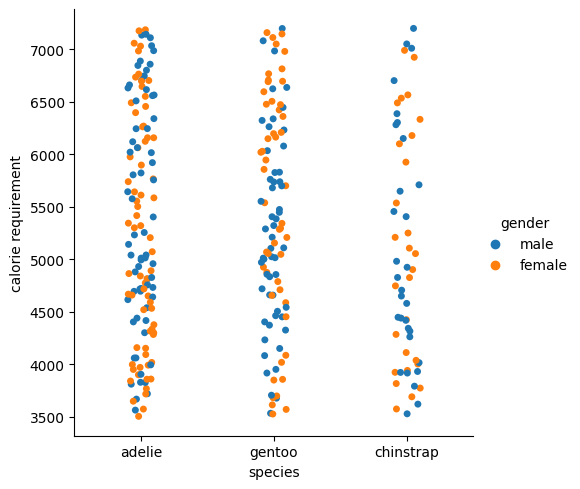

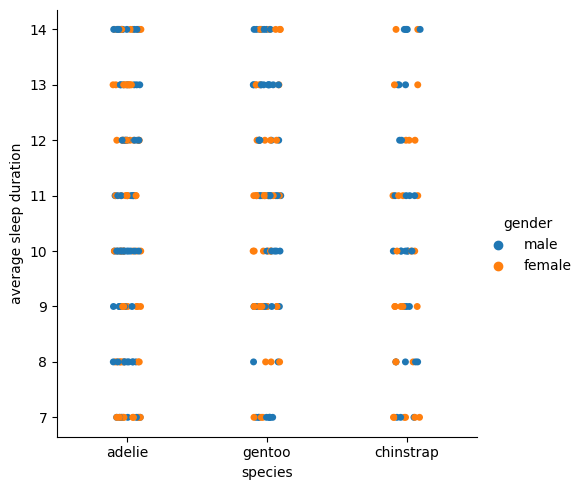

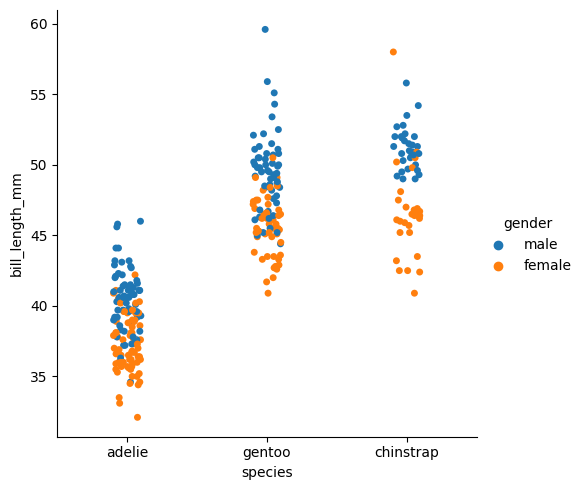

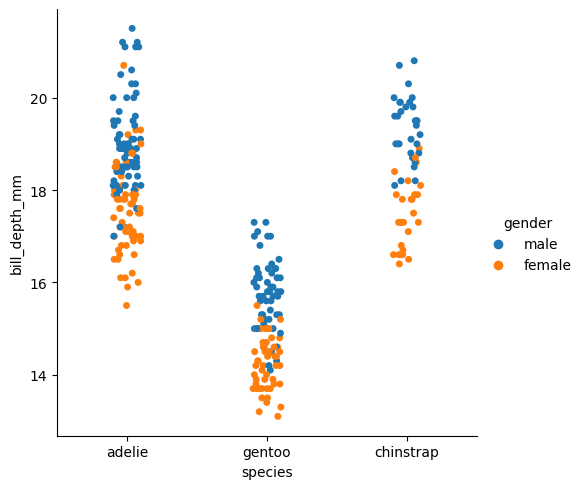

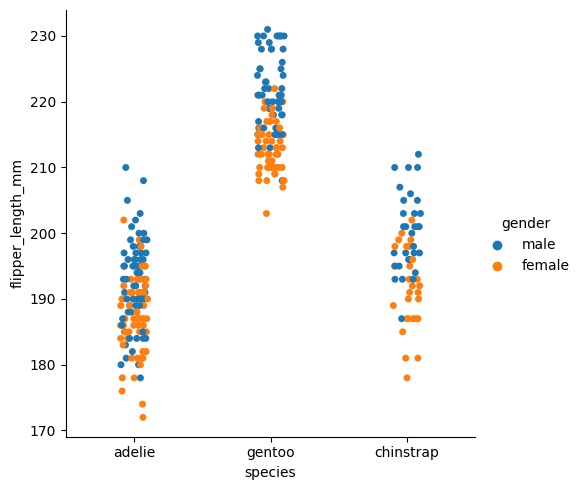

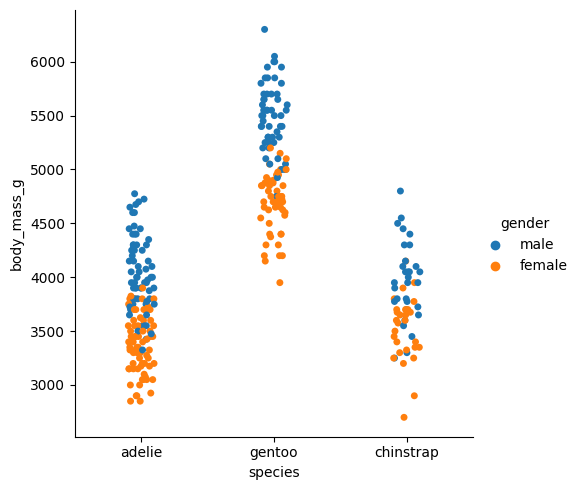

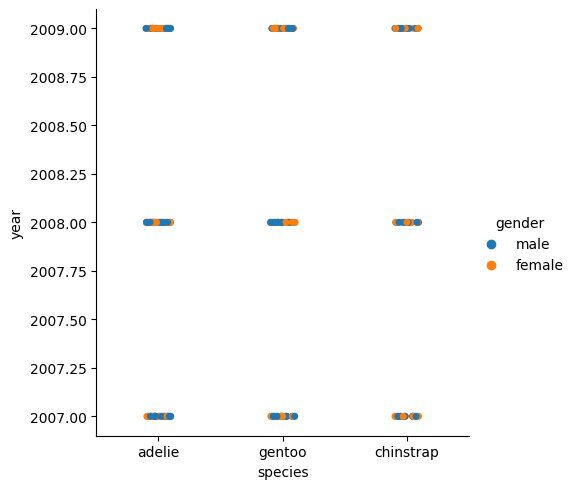

In [ ]:
for i, n_c in enumerate(numeric_cols):
  sns.catplot(data = df, x= 'species', y = n_c, hue='gender')

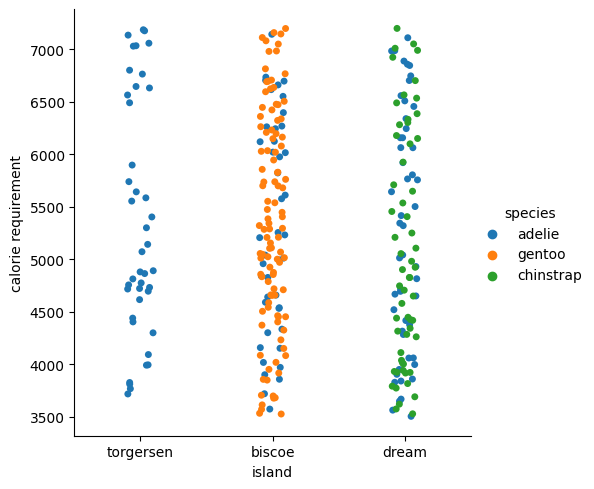

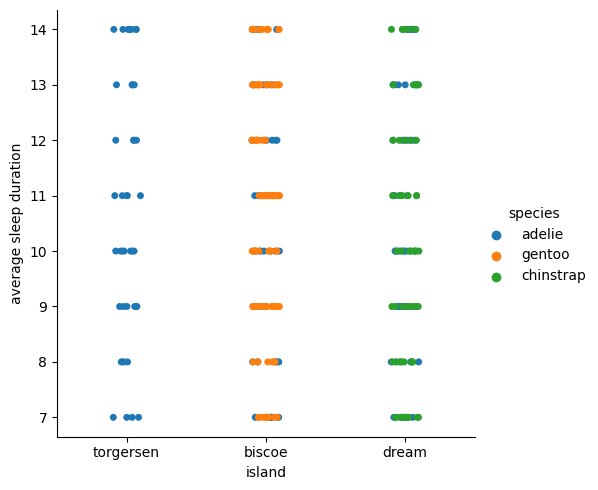

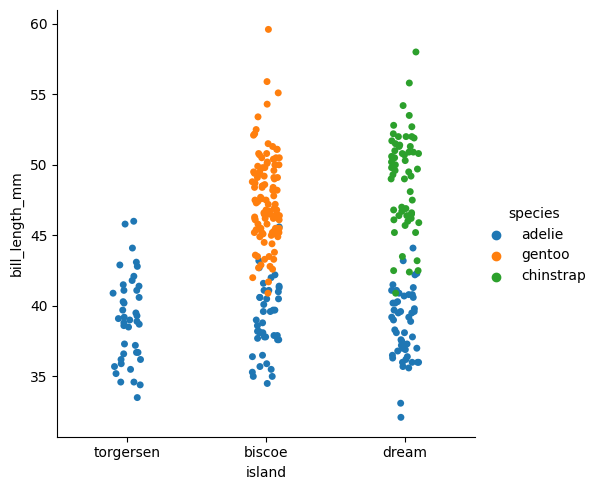

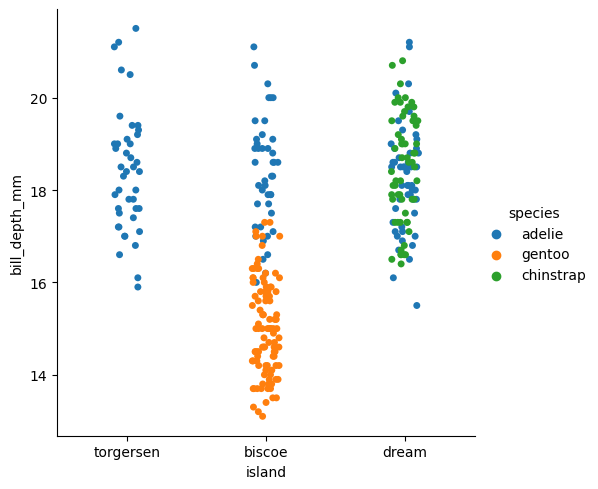

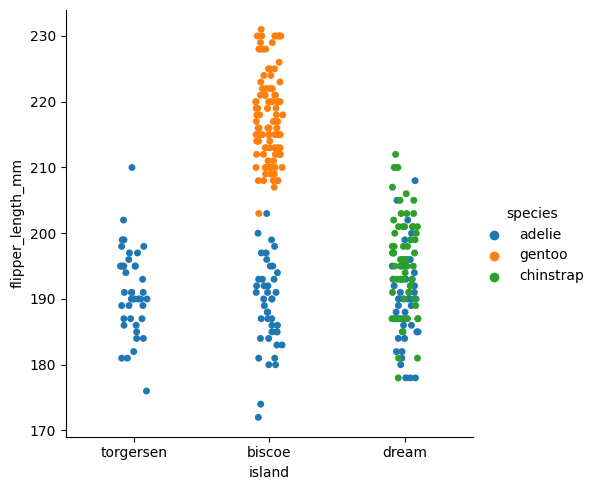

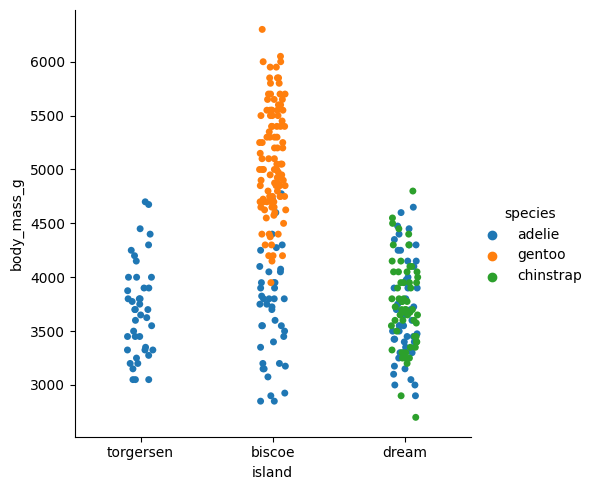

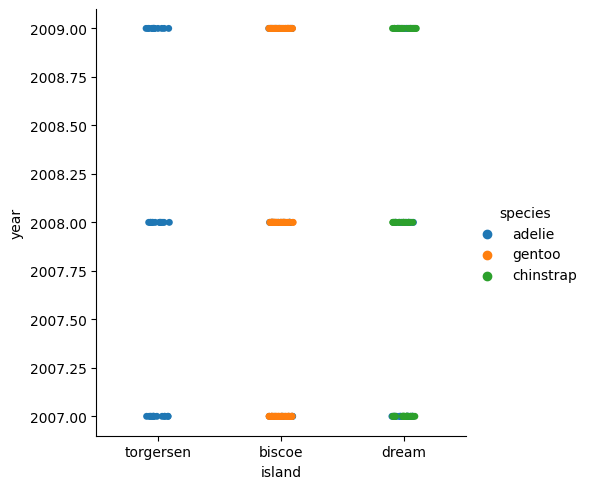

In [ ]:
for i, n_c in enumerate(numeric_cols):
  sns.catplot(data = df, x= 'island', y = n_c, hue='species')

### Convert categorical features
1. one hot
2. label encoder

In [ ]:
for c in categorical_cols:
  print(f'col = {c}, {list(df[c].unique())}')

col = gender, ['male', 'female']
col = species, ['adelie', 'gentoo', 'chinstrap']
col = island, ['torgersen', 'biscoe', 'dream']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 300 non-null    object 
 1   island                  300 non-null    object 
 2   calorie requirement     300 non-null    int64  
 3   average sleep duration  300 non-null    int64  
 4   bill_length_mm          300 non-null    float64
 5   bill_depth_mm           300 non-null    float64
 6   flipper_length_mm       300 non-null    float64
 7   body_mass_g             300 non-null    float64
 8   gender                  300 non-null    object 
 9   year                    300 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 25.8+ KB


### Normalization and Standardization

a. Find the min and max values for each column.

b. Rescale dataset columns to the range from 0 to 1

In [ ]:
to_norm_cols = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']

# train_df = df.copy()
#min max scale , (x - min) / (max - min)
for c in to_norm_cols:
  df[c] = (df[c] - df[c].min()) / (df[c].max() - df[c].min())


In [ ]:
df.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5278.846667,10.513333,0.430339,0.488135,0.489096,0.418264,2008.040000
std,1062.871716,2.237523,0.201221,0.233649,0.239595,0.224550,0.812774
min,3504.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
25%,4417.500000,9.000000,0.260909,0.309524,0.305085,0.236111,2007.000000
50%,5124.500000,10.000000,0.430909,0.505952,0.423729,0.375000,2008.000000
75%,6212.750000,12.000000,0.600909,0.666667,0.694915,0.578125,2009.000000
max,7197.000000,14.000000,1.000000,1.000000,1.000000,1.000000,2009.000000


# Dataset II - Diamond Dataset

In [ ]:
diamond_data = pd.read_csv('diamond.csv')
diamond_data

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,43892,3.54,60.8,57,2757,5.75,5.76,3.5
53936,53937,0.72,Good,D,SI1,35532,3.51,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.7,Very Good,D,SI1,32133,3.27,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,44248,4.03,61,58,2757,6.15,6.12,3.74


In [ ]:
print("Shape of the dataset",diamond_data.shape)

Shape of the dataset (53940, 13)


In [ ]:
diamond_data.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
count,53563,52430,52647,52428,53587,53940.000000,53940.000000,53246,52398,52357,52414,52719,52507
unique,52181,276,18,17,18,NaN,NaN,187,127,11443,556,552,378
top,FALSE,0.3,Ideal,G,SI1,NaN,NaN,62,56,MAYBE,FALSE,4.34,2.7
freq,480,2469,19938,10588,12592,NaN,NaN,2163,9377,180,488,422,735
mean,NaN,NaN,NaN,NaN,NaN,39521.990100,2.902669,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5486.892971,1.325985,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,30000.000000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,34780.000000,1.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,39547.500000,2.910000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,44252.000000,4.050000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

Handling missing entries

In [ ]:
#dropping unnecessary columns
diamond_data=diamond_data.drop(columns=['Unnamed: 0', 'average us salary'])

In [ ]:
cleaning_columns = diamond_data[['carat', 'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x', 'y', 'z']]

In [ ]:
for column in cleaning_columns:
  diamond_data[column] = pd.to_numeric(diamond_data[column], errors='coerce')
diamond_data=diamond_data.dropna()
diamond_data = diamond_data.reset_index()

In [ ]:
diamond_data.dtypes

index                                    int64
carat                                  float64
cut                                     object
color                                   object
clarity                                 object
number of diamonds mined (millions)    float64
depth                                  float64
table                                  float64
price                                  float64
x                                      float64
y                                      float64
z                                      float64
dtype: object

Handling mismatched string formats

In [ ]:
diamond_data['cut'] = diamond_data['cut'].str.lower()
diamond_data['color'] = diamond_data['color'].str.lower()
diamond_data['clarity'] = diamond_data['clarity'].str.lower()

In [ ]:
diamond_data.groupby('cut')['cut'].count()

cut
fair          1469
false            3
good          4393
ideal        19511
maybe            4
premium      12499
true             1
very good    10951
Name: cut, dtype: int64

In [ ]:
diamond_data = diamond_data[diamond_data['cut'] != 'false']
diamond_data = diamond_data[diamond_data['cut'] != 'maybe']
diamond_data = diamond_data[diamond_data['cut'] != 'true']

In [ ]:
diamond_data.groupby('cut')['cut'].count()

cut
fair          1469
good          4393
ideal        19511
premium      12499
very good    10951
Name: cut, dtype: int64

In [ ]:
diamond_data.groupby('color')['color'].count()

color
d         6115
e         8887
f         8633
false        4
g        10248
h         7529
i         4882
j         2517
maybe        5
true         3
Name: color, dtype: int64

In [ ]:
diamond_data = diamond_data[diamond_data['color'] != 'false']
diamond_data = diamond_data[diamond_data['color'] != 'maybe']
diamond_data = diamond_data[diamond_data['color'] != 'true']

In [ ]:
diamond_data.groupby('color')['color'].count()

color
d     6115
e     8887
f     8633
g    10248
h     7529
i     4882
j     2517
Name: color, dtype: int64

In [ ]:
diamond_data.groupby('clarity')['clarity'].count()

clarity
false        2
i1         676
if        1612
si1      11843
si2       8292
vs1       7378
vs2      11096
vvs1      3331
vvs2      4581
Name: clarity, dtype: int64

In [ ]:
diamond_data = diamond_data[diamond_data['clarity'] != 'false']

In [ ]:
diamond_data.describe()

,index,carat,number of diamonds mined (millions),depth,table,price,x,y,z
count,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000
mean,26977.549079,0.797450,2.901918,61.751191,57.454168,3931.951976,5.729914,5.733458,3.538247
std,15574.699716,0.473513,1.326275,1.433967,2.230631,3989.918432,1.121010,1.144504,0.706727
min,0.000000,0.200000,0.600000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,13489.000000,0.400000,1.750000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26982.000000,0.700000,2.910000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,40486.000000,1.040000,4.050000,62.500000,59.000000,5322.000000,6.540000,6.530000,4.030000
max,53939.000000,5.010000,5.200000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Handling outliers

In [ ]:
numeric_cols = diamond_data._get_numeric_data().columns
numeric_cols=list(numeric_cols)
numeric_cols = numeric_cols[0:8]

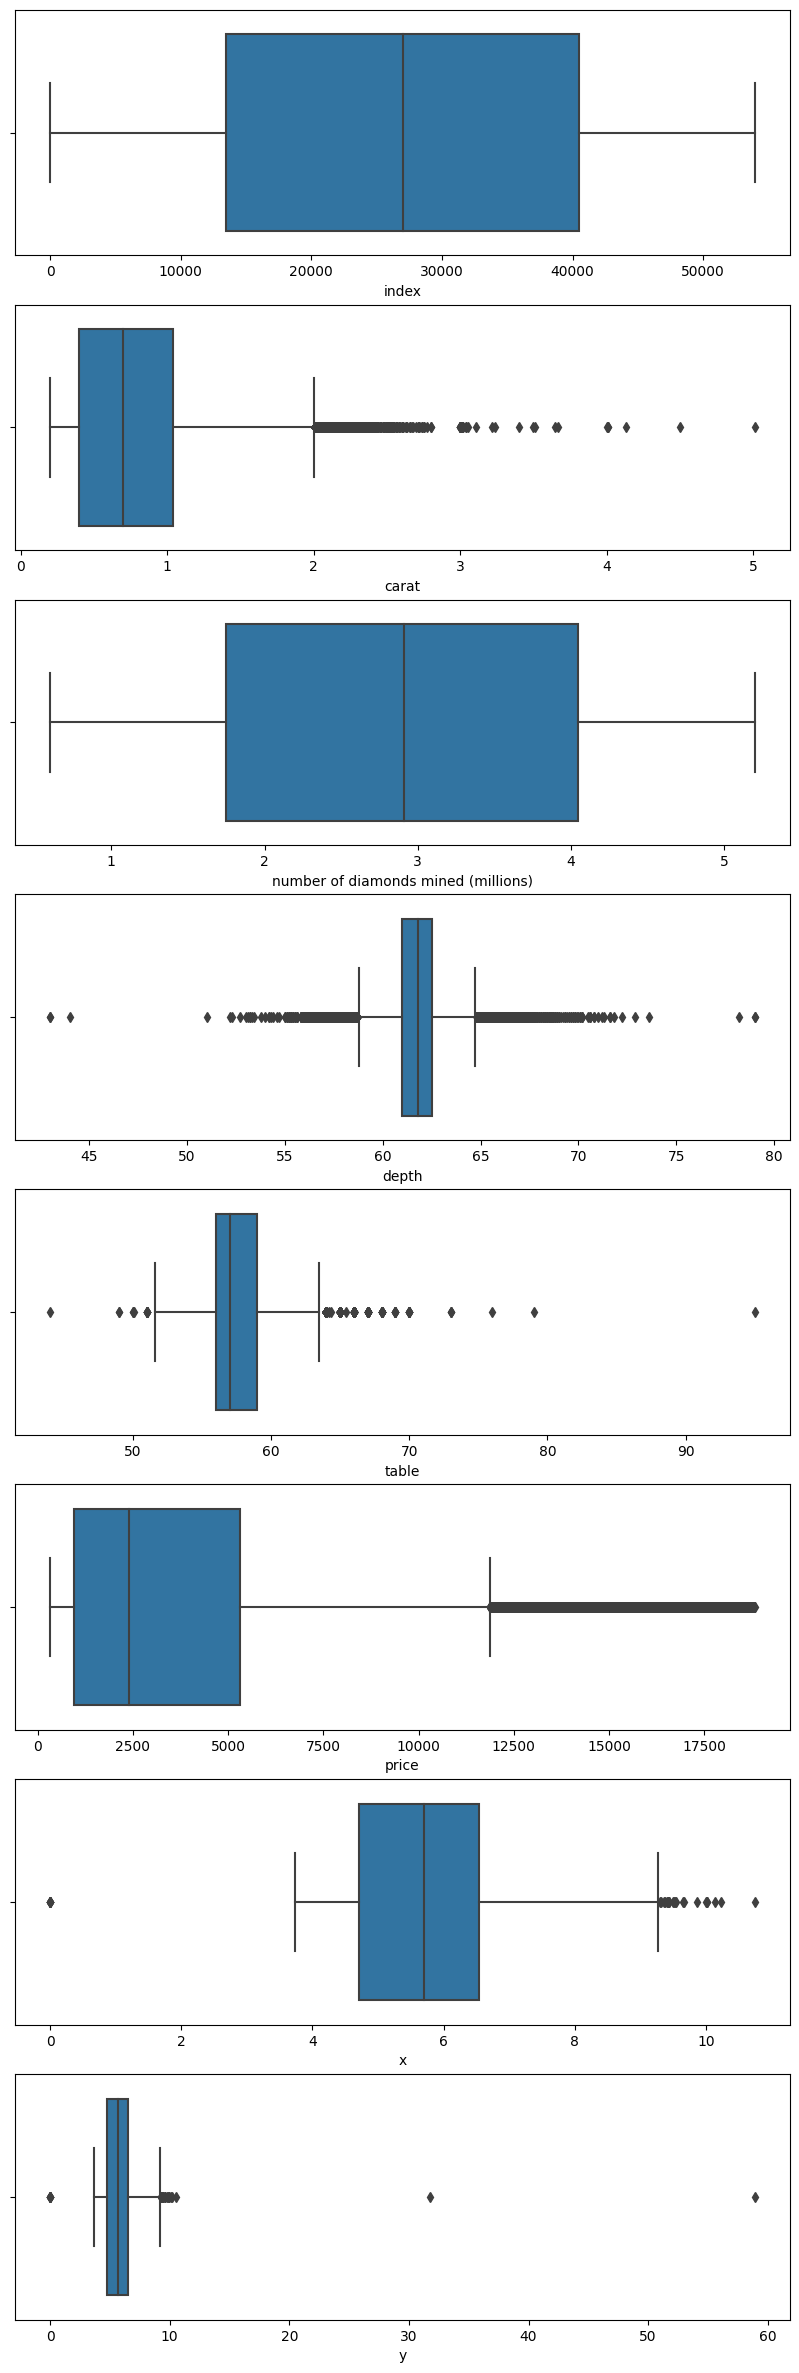

In [ ]:
# Box plot each numeric columns to detect outliers
fig, ax = plt.subplots(len(numeric_cols),1, figsize=(10,30))
i=0
for c in (numeric_cols):
  sns.boxplot(x = diamond_data[c], ax = ax[i])
  i+=1

In [ ]:
print("Dataset shape", diamond_data.shape)

def remove_outliers(c, df, debug = True):
  q1 = df[c].quantile(0.25)
  q3 = df[c].quantile(0.75)

  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  prev = df.shape[0]


  new_df = df.loc[df[c].between(lower, upper)]
  outliers_count = prev - new_df.shape[0]
  return new_df, outliers_count


for c in numeric_cols:
  diamond_data, count = remove_outliers(c, diamond_data)
  print(f'Detect and removed outliers {count} for column = {c}')

print("Dataset shape after removed outliers")
print(diamond_data.shape)
diamond_data = diamond_data.reset_index()

Dataset shape (48809, 12)
Detect and removed outliers 0 for column = index
Detect and removed outliers 1689 for column = carat
Detect and removed outliers 0 for column = number of diamonds mined (millions)
Detect and removed outliers 2527 for column = depth
Detect and removed outliers 305 for column = table
Detect and removed outliers 2159 for column = price
Detect and removed outliers 4 for column = x
Detect and removed outliers 1 for column = y
Dataset shape after removed outliers
(42124, 12)


Normalization

In [ ]:
#normalization (reference: Assignment 0 part 3 question 9)
normalize_columns = ['number of diamonds mined (millions)', 'depth', 'table', 'x', 'y', 'z']
for nc in normalize_columns:
  min = diamond_data[nc].min()
  max = diamond_data[nc].max()
  diamond_data[nc]=(diamond_data[nc]- min)/(max - min)
diamond_data

,level_0,index,carat,cut,color,clarity,number of diamonds mined (millions),depth,table,price,x,y,z
0,0,0,0.23,ideal,e,si2,0.958696,0.446429,0.260870,326.0,0.048458,0.065359,0.076415
1,1,1,0.21,premium,e,si1,0.236957,0.142857,0.782609,326.0,0.035242,0.034858,0.072642
2,3,3,0.29,premium,i,vs2,0.628261,0.607143,0.521739,334.0,0.103524,0.119826,0.082704
3,4,4,0.31,good,j,si2,0.891304,0.767857,0.521739,335.0,0.134361,0.145969,0.086478
4,5,5,0.24,very good,j,vvs2,0.056522,0.678571,0.434783,336.0,0.046256,0.061002,0.077987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42119,48826,53935,0.72,ideal,d,si1,0.639130,0.321429,0.434783,2757.0,0.444934,0.453159,0.110063
42120,48827,53936,0.72,good,d,si1,0.632609,0.732143,0.260870,2757.0,0.431718,0.450980,0.113522
42121,48828,53937,0.70,very good,d,si1,0.580435,0.678571,0.695652,2757.0,0.425110,0.435730,0.111950
42122,48829,53938,0.86,premium,h,si2,0.745652,0.357143,0.521739,2757.0,0.533040,0.531590,0.117610


In [ ]:
print(diamond_data.columns)
diamond_data = diamond_data.drop(columns=['level_0'])
diamond_data

Index(['level_0', 'index', 'carat', 'cut', 'color', 'clarity',
       'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x',
       'y', 'z'],
      dtype='object')


,index,carat,cut,color,clarity,number of diamonds mined (millions),depth,table,price,x,y,z
0,0,0.23,ideal,e,si2,0.958696,0.446429,0.260870,326.0,0.048458,0.065359,0.076415
1,1,0.21,premium,e,si1,0.236957,0.142857,0.782609,326.0,0.035242,0.034858,0.072642
2,3,0.29,premium,i,vs2,0.628261,0.607143,0.521739,334.0,0.103524,0.119826,0.082704
3,4,0.31,good,j,si2,0.891304,0.767857,0.521739,335.0,0.134361,0.145969,0.086478
4,5,0.24,very good,j,vvs2,0.056522,0.678571,0.434783,336.0,0.046256,0.061002,0.077987
...,...,...,...,...,...,...,...,...,...,...,...,...
42119,53935,0.72,ideal,d,si1,0.639130,0.321429,0.434783,2757.0,0.444934,0.453159,0.110063
42120,53936,0.72,good,d,si1,0.632609,0.732143,0.260870,2757.0,0.431718,0.450980,0.113522
42121,53937,0.70,very good,d,si1,0.580435,0.678571,0.695652,2757.0,0.425110,0.435730,0.111950
42122,53938,0.86,premium,h,si2,0.745652,0.357143,0.521739,2757.0,0.533040,0.531590,0.117610


Correlation Matrix

<ipython-input-48-89b8a97a79d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = diamond_data.corr()
<ipython-input-48-89b8a97a79d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs_corr_mat = abs(diamond_data.corr())


Text(0.5, 1.0, 'Absolute Correlation')

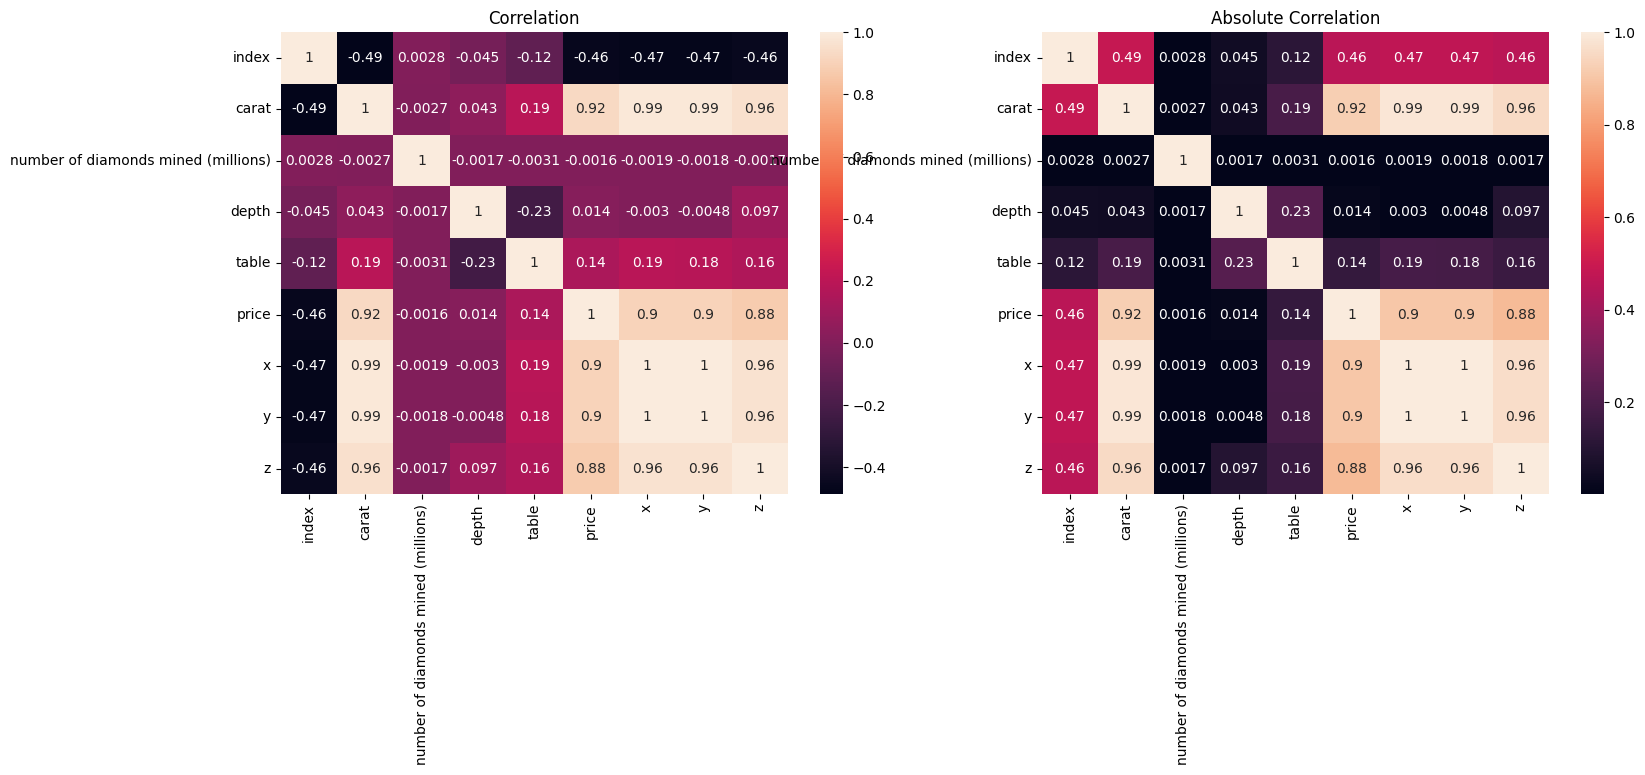

In [ ]:
corr_mat = diamond_data.corr()
abs_corr_mat = abs(diamond_data.corr())

fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.heatmap(corr_mat, annot=True, ax = ax[0])
ax[0].set_title("Correlation")
sns.heatmap(abs_corr_mat, annot=True, ax = ax[1])
ax[1].set_title("Absolute Correlation")

In [ ]:
pairs = corr_mat.unstack()
print('Head #######')
print(pairs.sort_values(ascending = False).head(15))
print()
print('Tail #######')
print()
pairs.sort_values(ascending = False).tail(5)

Head #######
index                                index                                  1.000000
carat                                carat                                  1.000000
y                                    y                                      1.000000
x                                    x                                      1.000000
price                                price                                  1.000000
depth                                depth                                  1.000000
number of diamonds mined (millions)  number of diamonds mined (millions)    1.000000
table                                table                                  1.000000
z                                    z                                      1.000000
y                                    x                                      0.998472
x                                    y                                      0.998472
carat                                x              

index  x       -0.470409
y      index   -0.471280
index  y       -0.471280
carat  index   -0.487350
index  carat   -0.487350
dtype: float64

Making columns categorical

In [ ]:
encoder_cut = OneHotEncoder(sparse=False)
encoder_color = OneHotEncoder(sparse=False)
encoder_clarity = OneHotEncoder(sparse=False)

encoded_cut=encoder_cut.fit_transform(diamond_data[['cut']])
encoded_color=encoder_color.fit_transform(diamond_data[['color']])
encoded_clarity=encoder_clarity.fit_transform(diamond_data[['clarity']])

encoded_cutdf = pd.DataFrame(encoded_cut, columns=encoder_cut.get_feature_names_out(['cut']))
encoded_colordf = pd.DataFrame(encoded_color, columns=encoder_color.get_feature_names_out(['color']))
encoded_claritydf = pd.DataFrame(encoded_clarity, columns=encoder_clarity.get_feature_names_out(['clarity']))

encoded_cutdf = encoded_cutdf.reset_index()
encoded_colordf = encoded_colordf.reset_index()
encoded_claritydf = encoded_claritydf.reset_index()

diamond_data = diamond_data.merge(encoded_cutdf, left_index=True, right_index=True)
diamond_data = diamond_data.merge(encoded_colordf, left_index=True, right_index=True)
diamond_data = diamond_data.merge(encoded_claritydf, left_index=True, right_index=True)
diamond_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-50-79cfdd678c9c>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
 

,index_x,carat,cut,color,clarity,number of diamonds mined (millions),depth,table,price,x,...,color_j,index_y,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,0,0.23,ideal,e,si2,0.958696,0.446429,0.260870,326.0,0.048458,...,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.21,premium,e,si1,0.236957,0.142857,0.782609,326.0,0.035242,...,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.29,premium,i,vs2,0.628261,0.607143,0.521739,334.0,0.103524,...,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.31,good,j,si2,0.891304,0.767857,0.521739,335.0,0.134361,...,1.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0.24,very good,j,vvs2,0.056522,0.678571,0.434783,336.0,0.046256,...,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42119,53935,0.72,ideal,d,si1,0.639130,0.321429,0.434783,2757.0,0.444934,...,0.0,42119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42120,53936,0.72,good,d,si1,0.632609,0.732143,0.260870,2757.0,0.431718,...,0.0,42120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42121,53937,0.70,very good,d,si1,0.580435,0.678571,0.695652,2757.0,0.425110,...,0.0,42121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42122,53938,0.86,premium,h,si2,0.745652,0.357143,0.521739,2757.0,0.533040,...,0.0,42122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# diamond_data.to_csv('processed_diamond.csv', index=False)

<ipython-input-53-74c009014a49>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond_data['carat'],bins=5)


<Axes: xlabel='carat', ylabel='Density'>

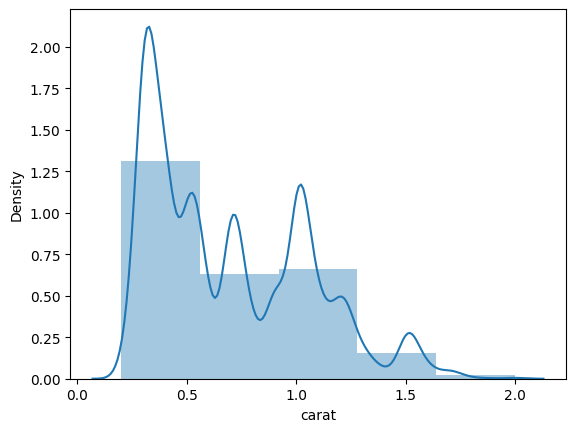

In [ ]:
sns.distplot(diamond_data['carat'],bins=5)

Text(0.5, 1.0, 'Average price of diamond on the basis of cut')

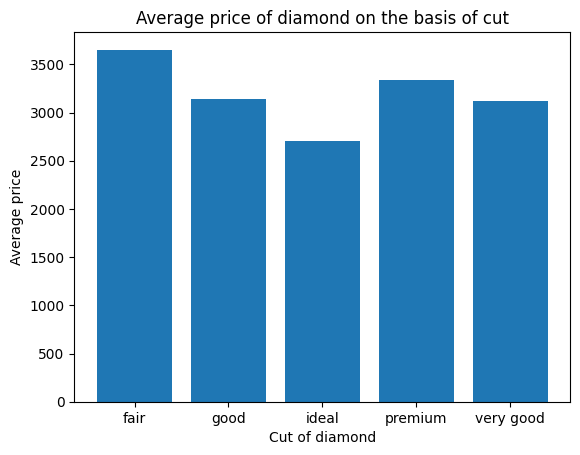

In [ ]:
cut_price_df = diamond_data.groupby('cut')['price'].mean().reset_index()
cut_price_df
plt.bar(cut_price_df['cut'], cut_price_df['price'])
plt.xlabel("Cut")
plt.ylabel("Average price")
plt.title("Average price of diamond on the basis of cut")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


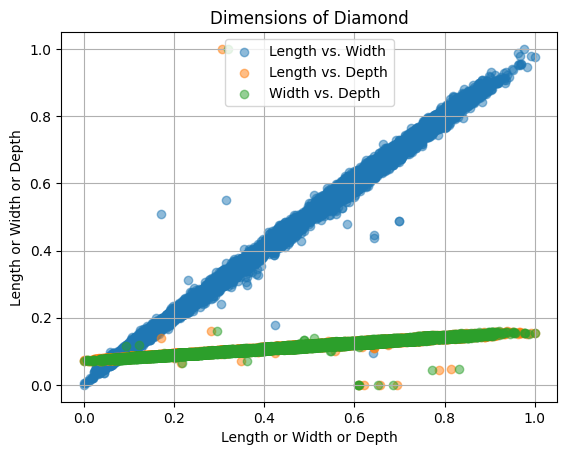

In [ ]:
plt.scatter(diamond_data['x'], diamond_data['y'], label='Length vs. Width', alpha=0.5)
plt.scatter(diamond_data['x'], diamond_data['z'], label='Length vs. Depth', alpha=0.5)
plt.scatter(diamond_data['y'], diamond_data['z'], label='Width vs. Depth', alpha=0.5)
plt.xlabel('Length or Width or Depth')
plt.ylabel('Length or Width or Depth')
plt.legend()
plt.title('Dimensions of Diamond')
plt.grid()
plt.show()

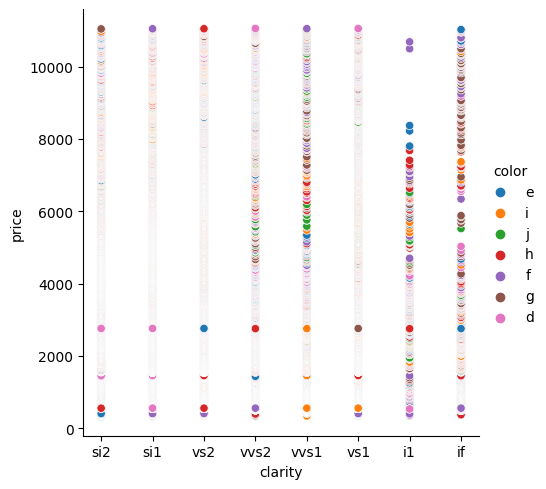

In [ ]:
sns.relplot(x='clarity',y='price',hue='color',data=diamond_data)

<Axes: xlabel='clarity', ylabel='price'>

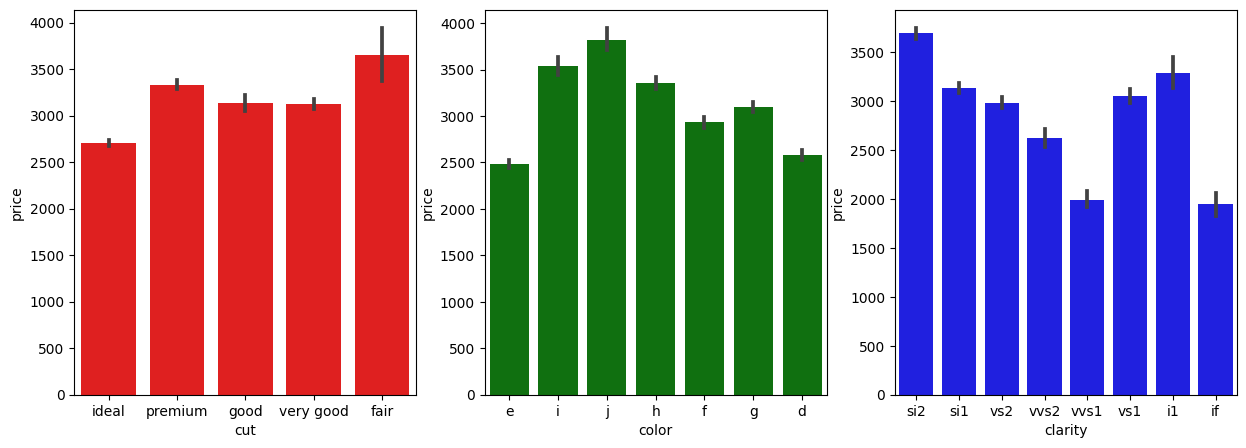

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x="cut", y="price", data=diamond_data, ax = ax[0], color="red")
sns.barplot(x="color", y="price", data=diamond_data, ax = ax[1], color="green")
sns.barplot(x="clarity", y="price", data=diamond_data, ax = ax[2], color="blue")

### References:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
